In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from pandas import read_csv
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, SimpleRNN, BatchNormalization
from keras.callbacks import EarlyStopping

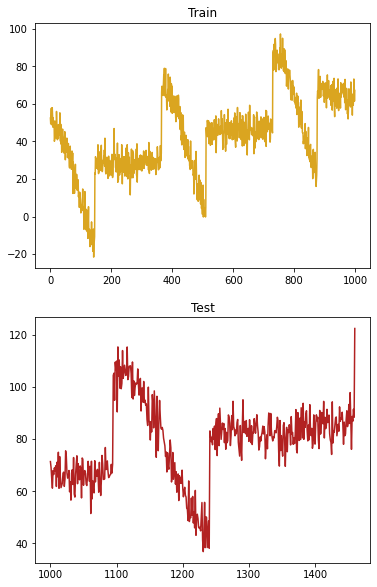

In [ ]:
train_data = read_csv('/content/train.csv')
test_data = read_csv('/content/test.csv')

plt.subplot(2,1,1)
plt.plot(train_data.time, train_data.value, c = 'goldenrod')
plt.gca().set_title("Train")
plt.subplot(2,1,2)
plt.plot(test_data.time, test_data.value, c = 'firebrick')
plt.gca().set_title("Test")
plt.subplots_adjust( top=2)
plt.show()

In [ ]:
train = np.array(train_data.value).reshape(-1, 1)
test = np.array(test_data.value).reshape(-1, 1)
seq_length = 40

train_time_steps = train.shape[0]
test_time_steps = test.shape[0]

train_x = []
train_y = []
# make dataset - train & test
for i in range(train_time_steps - seq_length - 1 ):
  x = train[i : i+seq_length]
  y = train[i + seq_length + 1]
  train_x.append(x)
  train_y.append(y)

test_x = []
test_y = []
for i in range(test_time_steps - seq_length - 1 ):
  x = test[i : i+seq_length]
  y = test[i + seq_length + 1]
  test_x.append(x)
  test_y.append(y)

In [ ]:
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

model = Sequential()
model.add(SimpleRNN(80, input_shape = (seq_length, 1), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(SimpleRNN(64))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Dense(1))

# monitor validation progress
early = EarlyStopping(monitor = "val_loss", patience = 10)
callbacks_list = [early]
    
model.compile(loss = 'mean_squared_error',
              optimizer = 'adam',
              metrics = [tf.keras.metrics.MeanAbsoluteError()])

model.fit(x = train_x, y = train_y,
          validation_data = (test_x, test_y),
          batch_size = 64,
          epochs = 2000,
          callbacks= callbacks_list)

Epoch 1/2000
15/15 [==============================] - 3s 60ms/step - loss: 2120.5400 - mean_absolute_error: 42.7392 - val_loss: 5307.1274 - val_mean_absolute_error: 71.3140
Epoch 2/2000
15/15 [==============================] - 1s 38ms/step - loss: 1936.4832 - mean_absolute_error: 42.0445 - val_loss: 4543.0034 - val_mean_absolute_error: 65.7884
Epoch 3/2000
15/15 [==============================] - 1s 37ms/step - loss: 1830.0140 - mean_absolute_error: 41.5702 - val_loss: 3737.9602 - val_mean_absolute_error: 59.3971
Epoch 4/2000
15/15 [==============================] - 1s 37ms/step - loss: 1758.5205 - mean_absolute_error: 41.0381 - val_loss: 3227.1584 - val_mean_absolute_error: 55.0301
Epoch 5/2000
15/15 [==============================] - 1s 36ms/step - loss: 1690.0154 - mean_absolute_error: 40.2218 - val_loss: 2904.4700 - val_mean_absolute_error: 52.1851
Epoch 6/2000
15/15 [==============================] - 1s 35ms/step - loss: 1632.9709 - mean_absolute_error: 39.4661 - val_loss: 2812.77

In [ ]:
p = model.predict(test_x)

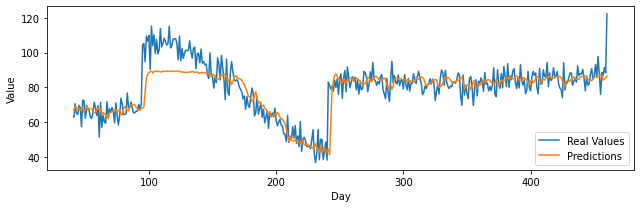

In [ ]:
fig = plt.figure(figsize=(9,3))
plt.plot(test_data.index[seq_length+1:],test_y,label="Real Values")
plt.plot(test_data.index[seq_length+1:],p,label="Predictions")
plt.xlabel("Day")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()